In [1]:
import os
import scipy.io
import numpy as np
from scipy import signal

data_path = "/kaggle/input/control1"
lowcut = 0.4 
highcut = 100 
fs_original = 500
fs_new = 250

control_data = []
control_path = os.path.join(data_path, 'Control')

for foldername in os.listdir(control_path):
    subfolder_path = os.path.join(control_path, foldername)
    control_data.append(subfolder_path)

Control30 = []

for control_data_path in control_data:
    n_epochs = 70 
    start_epoch = 1
    end_epoch = 110

    control_arr = []

    for i in range(start_epoch, end_epoch+1):
        epoch_path = os.path.join(control_data_path, f"trial{i}.mat")
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]    
        #print(mat_data1.shape)
        # Downsampling
        num_samples_original = mat_data1.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(mat_data1, num_samples_new, axis=-1)
        #print(downsampled_data.shape)
        
        control_arr.append(downsampled_data)
        Control30.append(downsampled_data)

Control30 = np.array(Control30)

print(Control30.shape)


(3300, 60, 1000)


In [2]:
# from scipy.stats import entropy

# alpha_band = (8, 12)
# beta_band = (12, 35)
# delta_band = (.5, 4)
# epsilon = 1e-10

# Control_feature = np.zeros((Control30.shape[0], Control30.shape[1], Control30.shape[2] + 4))

# for i in range(Control30.shape[0]):
#     for j in range(Control30.shape[1]):
#         channel_data = Control30[i, j, :]
#         freq_spectrum = np.fft.fft(channel_data)
#         power_spectrum = np.abs(freq_spectrum) ** 2

#         alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
#         beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
#         delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

#         channel_min_value = np.min(channel_data)
#         channel_max_value = np.max(channel_data)

#         power_spectrum_adjusted = power_spectrum + epsilon
#         entropy_values = entropy(power_spectrum_adjusted)
#         values = np.array([alpha_power, beta_power, delta_power, entropy_values])
#         rescaled_values = (values - values.min()) * (channel_max_value - channel_min_value) / (values.max() - values.min()) + channel_min_value
#         concatenated_data = np.concatenate((channel_data, rescaled_values))

#         Control_feature[i, j, :-4] = channel_data
#         Control_feature[i, j, -4:] = rescaled_values

# print(Control_feature.shape)
import numpy as np

features_matrix_control = np.zeros((3300, 60*4))  # Create an array to store the features

# Loop through the data and extract features for each channel
for i, data in enumerate(Control30):
    channel_features = np.zeros(60*4)  # Create an array to store features for each channel
    
    for j, channel_data in enumerate(data):
        freq_spectrum = np.fft.fft(channel_data)
        power_spectrum = np.abs(freq_spectrum) ** 2

        alpha_band = (8, 12)
        beta_band = (12, 30)
        delta_band = (0.5, 4)

        alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
        beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
        delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

        channel_min_value = np.min(channel_data)
        channel_max_value = np.max(channel_data)

        power_spectrum_adjusted = power_spectrum + epsilon
        entropy_values = entropy(power_spectrum_adjusted)

        channel_features[j*4:(j+1)*4] = [alpha_power, beta_power, delta_power, entropy_values]

    features_matrix_control[i] = channel_features

# Print the shape of the features matrix
print("Features Matrix Shape:", features_matrix_control.shape)


(3300, 60, 1004)


In [3]:
import os
import scipy.io
import numpy as np
from scipy import signal
data_path = "/kaggle/input/concussed1"
lowcut = 0.4 
highcut = 100 
fs_original = 500
fs_new = 250  

concussed_data = []
concussed_path = os.path.join(data_path, 'Concussed')
for foldername in os.listdir(concussed_path):
    subfolder_path = os.path.join(concussed_path, foldername)
    concussed_data.append(subfolder_path)

Concussed52 = []
for concussed_data_path in concussed_data:
    n_epochs = 70
    start_epoch = 1
    end_epoch = 110
    concussed_arr = []

    for i in range(start_epoch, end_epoch+1):
        epoch_path = f"{concussed_data_path}/trial{i}.mat"
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]
        num_samples_original = mat_data1.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(mat_data1, num_samples_new, axis=-1)
        
        concussed_arr.append(np.array(downsampled_data))
        
        Concussed52.append(downsampled_data)

Concussed52 = np.array(Concussed52)

print( Concussed52.shape)


(5390, 60, 1000)


In [4]:
from scipy.stats import entropy

alpha_band = (8, 12)
beta_band = (12, 35)
delta_band = (.5, 4)
epsilon = 1e-10

Concussed_feature = np.zeros((Concussed52.shape[0], Concussed52.shape[1], Concussed52.shape[2] + 4))

for i in range(Concussed52.shape[0]):
    for j in range(Concussed52.shape[1]):
        channel_data = Concussed52[i, j, :]
        freq_spectrum = np.fft.fft(channel_data)
        power_spectrum = np.abs(freq_spectrum) ** 2

        alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
        beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
        delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

        channel_min_value = np.min(channel_data)
        channel_max_value = np.max(channel_data)

        power_spectrum_adjusted = power_spectrum + epsilon
        entropy_values = entropy(power_spectrum_adjusted)
        values = np.array([alpha_power, beta_power, delta_power, entropy_values])
        rescaled_values = (values - values.min()) * (channel_max_value - channel_min_value) / (values.max() - values.min()) + channel_min_value
        concatenated_data = np.concatenate((channel_data, rescaled_values))

        Concussed_feature[i, j, :-4] = channel_data
        Concussed_feature[i, j, -4:] = rescaled_values

print(Concussed_feature.shape)


(5390, 60, 1004)


In [8]:
dataset = np.concatenate((Control_feature, Concussed_feature), axis=0)
labels = np.concatenate((np.zeros(Control_feature.shape[0]), np.ones(Concussed_feature.shape[0])))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)
mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(60,1004)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
218/218 [==============================] - 6s 24ms/step - loss: 0.6386 - accuracy: 0.6548
Epoch 2/100
218/218 [==============================] - 5s 25ms/step - loss: 0.5294 - accuracy: 0.7376
Epoch 3/100
218/218 [==============================] - 5s 23ms/step - loss: 0.4774 - accuracy: 0.7804
Epoch 4/100
218/218 [==============================] - 5s 23ms/step - loss: 0.4075 - accuracy: 0.8106
Epoch 5/100
218/218 [==============================] - 5s 23ms/step - loss: 0.3662 - accuracy: 0.8354
Epoch 6/100
218/218 [==============================] - 5s 24ms/step - loss: 0.3090 - accuracy: 0.8727
Epoch 7/100
218/218 [==============================] - 5s 23ms/step - loss: 0.2410 - accuracy: 0.9039
Epoch 8/100
218/218 [==============================] - 5s 24ms/step - loss: 0.1841 - accuracy: 0.9272
Epoch 9/100
218/218 [==============================] - 5s 24ms/step - loss: 0.1667 - accuracy: 0.9386
Epoch 10/100
218/218 [==============================] - 5s 23ms/step - loss: 0.104

In [17]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100))


55/55 [==============================] - 1s 9ms/step - loss: 1.3068 - accuracy: 0.8809
Accuracy: 88.09%


In [18]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


55/55 [==============================] - 1s 9ms/step
Confusion Matrix:
[[558 126]
 [ 81 973]]


In [19]:
from sklearn.metrics import classification_report
target_names = ['Control', 'Concussed']
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     Control       0.87      0.82      0.84       684
   Concussed       0.89      0.92      0.90      1054

    accuracy                           0.88      1738
   macro avg       0.88      0.87      0.87      1738
weighted avg       0.88      0.88      0.88      1738



Classification Report:
              precision    recall  f1-score   support

     Control       0.87      0.82      0.84       684
   Concussed       0.89      0.92      0.90      1054

    accuracy                           0.88      1738
   macro avg       0.88      0.87      0.87      1738
weighted avg       0.88      0.88      0.88      1738



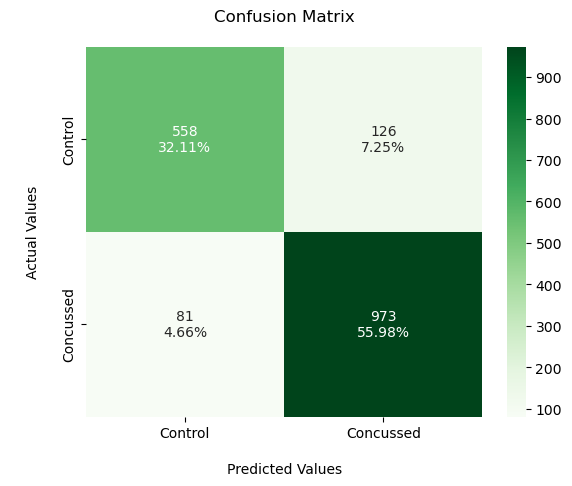

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ['Control', 'Concussed']
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test, y_pred)

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cm, fmt='', annot=labels, cmap='Greens')
ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

plt.show()


55/55 [==============================] - 1s 9ms/step


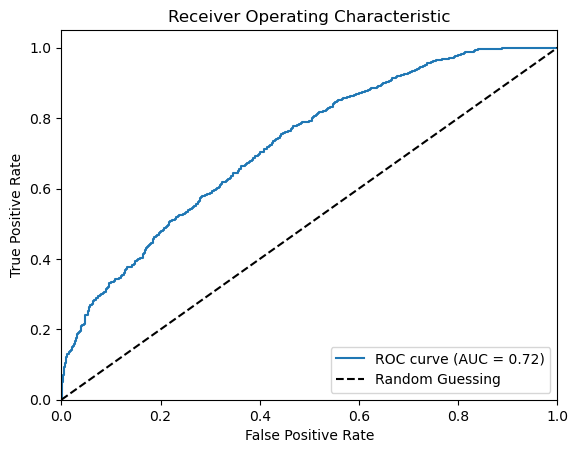

In [27]:
X_test_norm = (X_test - mean) / std
y_pred_prob = model.predict(X_test_norm)

y_pred_prob_positive = y_pred_prob[:, 0]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)
roc_auc = roc_auc_score(y_test, y_pred_prob_positive)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
